<a href="https://colab.research.google.com/github/mghildi/Loan_Approval_Logistic_Regression/blob/main/Loan_Approval_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:

!gdown 19KW_frhwKyEBYvTl4HvjoX6nxzZNex4Z

Downloading...
From: https://drive.google.com/uc?id=19KW_frhwKyEBYvTl4HvjoX6nxzZNex4Z
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 147MB/s] 


In [5]:
df = pd.read_csv("/content/logistic_regression.csv")
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
df.shape

(396030, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
#lets first change term to int column
df['term_numeric'] = df['term'].str.extract(r'(\d+)').astype(int)

In [9]:
#now remove column term
df = df.drop(columns = 'term')

In [10]:
#lets do same with emp_length
df['emp_length_numeric'] = df['emp_length'].str.extract(r'(\d+)').astype(float)

In [11]:
df= df.drop(columns = 'emp_length')

In [12]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,term_numeric,emp_length_numeric
0,10000.0,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,Jan-2015,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",36,10.0
1,8000.0,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",36,4.0
2,15600.0,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,Jan-2015,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",36,1.0
3,7200.0,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,Nov-2014,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",36,6.0
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Apr-2013,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",60,9.0


In [13]:
#So we have 27 features with 20681 row
#let check null values and central tendencies
df.describe()
#maximum missing values is under mort_acc

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,term_numeric,emp_length_numeric
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000,396030.000000,377729.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648,41.698053,6.022566
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174,10.212038,3.517094
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,36.000000,1.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000,36.000000,3.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000,36.000000,6.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000,36.000000,10.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,60.000000,10.000000


In [14]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [15]:
#Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)
#count plots
import matplotlib.pyplot as plt
import seaborn as sns
"""sns.pairplot(data=df, y_vars=["loan_status"], x_vars=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'], height=1.5, aspect=1)
plt.show()
"""

'sns.pairplot(data=df, y_vars=["loan_status"], x_vars=[\'loan_amnt\', \'term\', \'int_rate\', \'installment\', \'grade\', \'sub_grade\',\n       \'emp_title\', \'emp_length\', \'home_ownership\', \'annual_inc\',\n       \'verification_status\', \'issue_d\', \'loan_status\', \'purpose\', \'title\',\n       \'dti\', \'earliest_cr_line\', \'open_acc\', \'pub_rec\', \'revol_bal\',\n       \'revol_util\', \'total_acc\', \'initial_list_status\', \'application_type\',\n       \'mort_acc\', \'pub_rec_bankruptcies\', \'address\'], height=1.5, aspect=1)\nplt.show()\n'

In [16]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
numerical_columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'term_numeric', 'emp_length_numeric'],
      dtype='object')

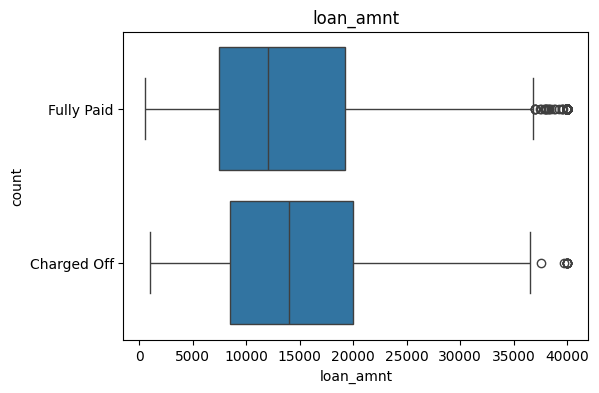

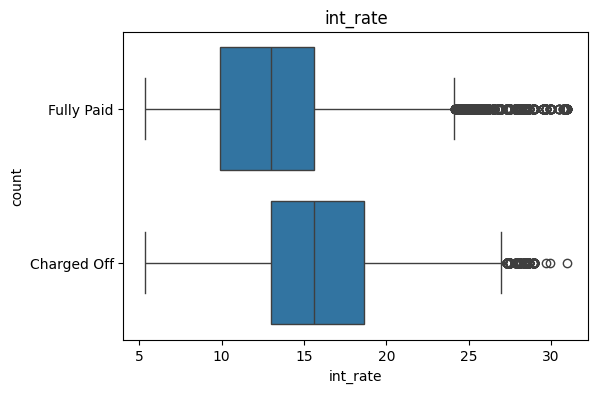

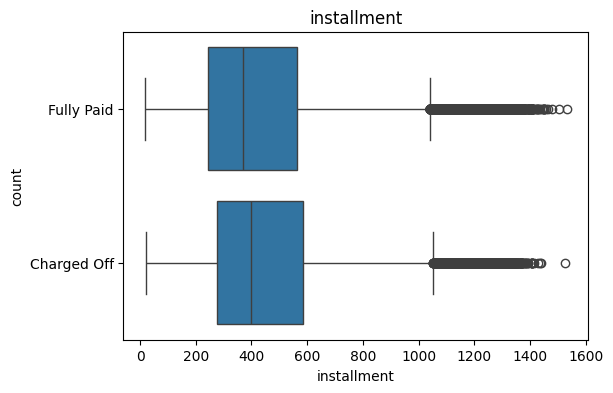

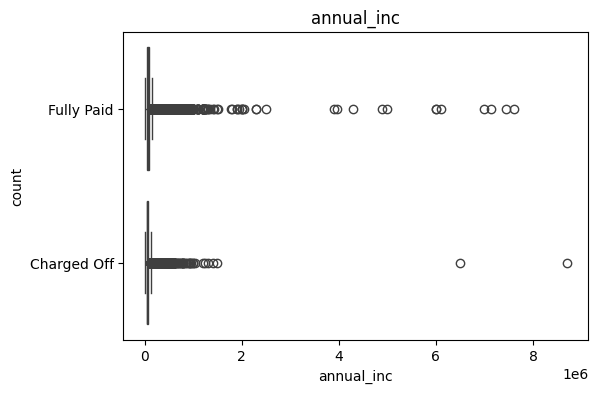

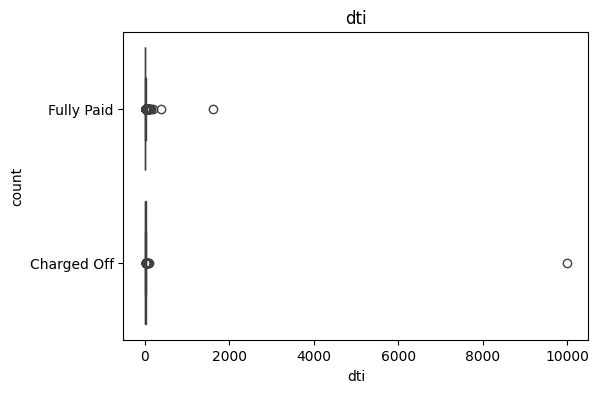

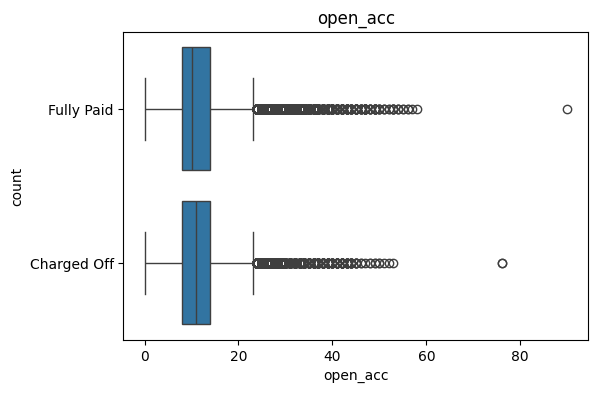

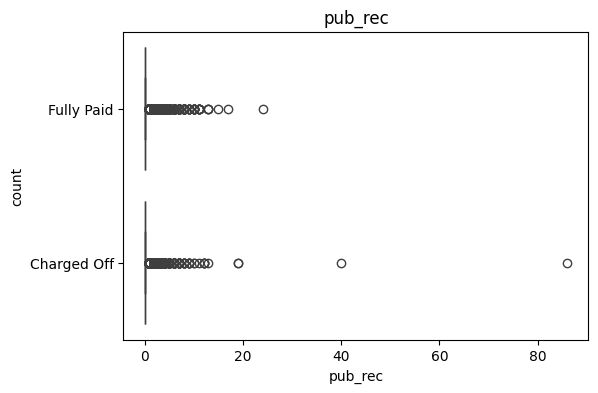

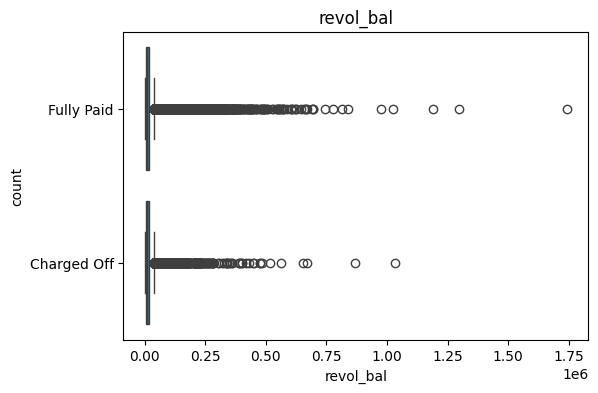

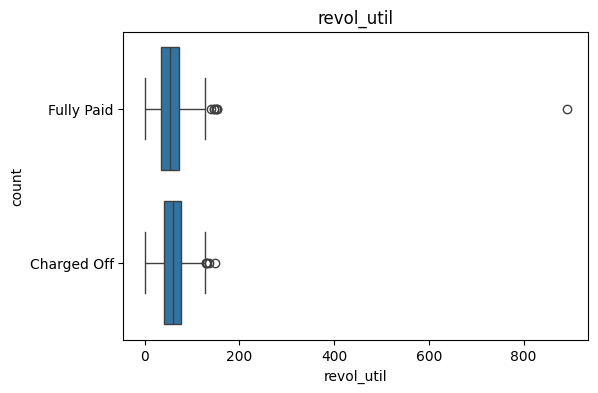

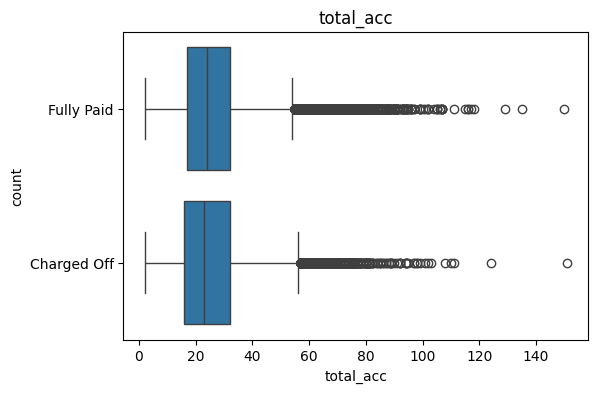

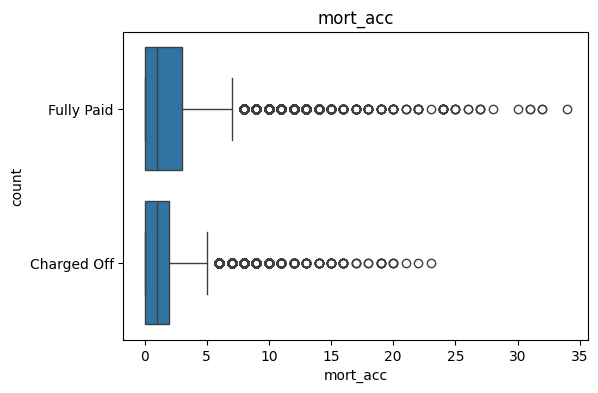

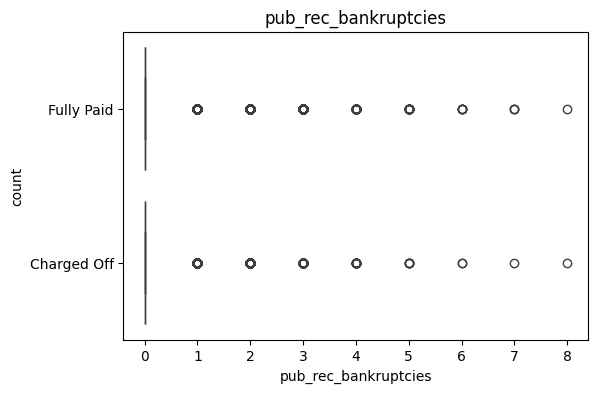

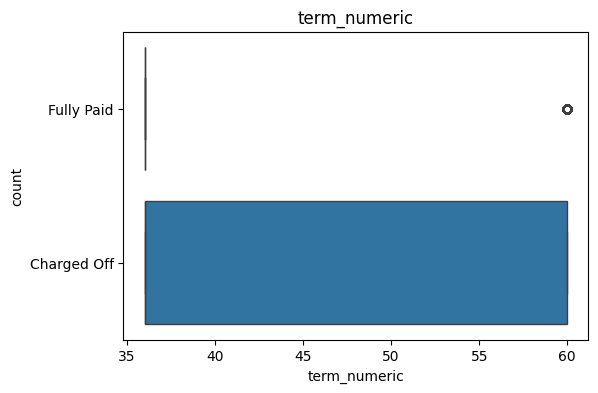

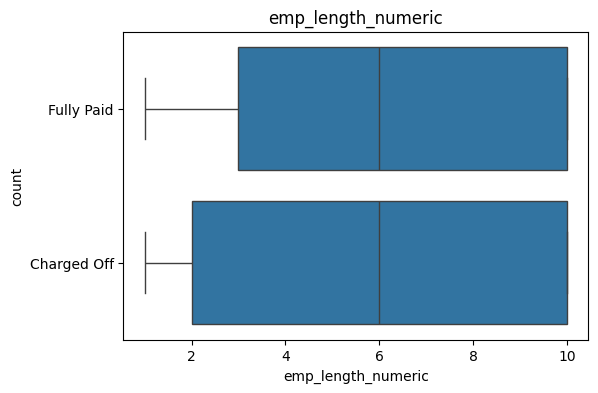

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range (len(numerical_columns)):
  plt.subplots(figsize = (6,4))
  sns.boxplot(x= df[numerical_columns[i]], y = df['loan_status'], data = df)
  plt.xlabel(numerical_columns[i])
  plt.ylabel('count')
  plt.title(numerical_columns[i])

  plt.show()

In [18]:

#Similar median - dti,open_acc,revol_bal,revol_util,total_acc - have simialr median so it does not have much impact on loan status hence these featues can be dropped
columns_to_drop = ['dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
df = df.drop(columns=columns_to_drop)

In [19]:
df.shape

(396030, 22)

In [20]:
# Feature Engineering

df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x>0.0 else 0)
df['pub_rec_flag'].value_counts()

0    338272
1     57758
Name: pub_rec_flag, dtype: int64

In [21]:
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x>0.0 else 0)
df['mort_acc_flag'].value_counts()

1    218458
0    177572
Name: mort_acc_flag, dtype: int64

In [22]:
df['pub_rec_bankruptcies_flag']= df['pub_rec_bankruptcies'].apply(lambda x: 1 if x>0 else 0)
df['pub_rec_bankruptcies_flag'].value_counts()

0    350915
1     45115
Name: pub_rec_bankruptcies_flag, dtype: int64

In [23]:
dropcol = ['pub_rec','pub_rec_bankruptcies', 'mort_acc']
df = df.drop(columns = dropcol)

In [24]:
df =df.drop(columns = 'address')

In [25]:
df =df.drop(columns = ['emp_title', 'emp_length_numeric'])

In [26]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'term_numeric',
       'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag'],
      dtype='object')

In [27]:
df.isnull().sum()

loan_amnt                       0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
title                        1755
earliest_cr_line                0
initial_list_status             0
application_type                0
term_numeric                    0
pub_rec_flag                    0
mort_acc_flag                   0
pub_rec_bankruptcies_flag       0
dtype: int64

In [28]:
#fill missing value of title column. Dropping column
df= df.drop(columns = 'title')

In [29]:

categorical_columns1 = ['grade', 'sub_grade', 'home_ownership' ]
categorical_columns2 = ['earliest_cr_line','initial_list_status', 'application_type']
categorical_columns3 = ['verification_status','issue_d']
categorical_columns4=['purpose']



In [30]:
#one hot encoding for categorical column
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns1])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns1))

df_encoded = pd.concat([df, encoded_df], axis=1)
df = df_encoded.drop(columns=categorical_columns1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
#one hot encoding for categorical column
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns2])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns2))

df_encoded = pd.concat([df, encoded_df], axis=1)
df = df_encoded.drop(columns=categorical_columns2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns3])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns3))

df_encoded = pd.concat([df, encoded_df], axis=1)
df = df_encoded.drop(columns=categorical_columns3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns4])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns4))

df_encoded = pd.concat([df, encoded_df], axis=1)
df = df_encoded.drop(columns=categorical_columns4)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
df['loan_status'].value_counts()
df['loan_status'] = df['loan_status'].apply(lambda x:1 if x == 'Fully Paid' else 0)
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,term_numeric,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_A,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,11.44,329.48,117000.0,1,36,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8000.0,11.99,265.68,65000.0,1,36,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,10.49,506.97,43057.0,1,36,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,1,36,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,0,60,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
''' import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)
plt.show() '''

' import matplotlib.pyplot as plt\nimport seaborn as sns\nplt.subplots(figsize=(16,6))\nsns.heatmap(df.corr(), annot = True)\nplt.show() '

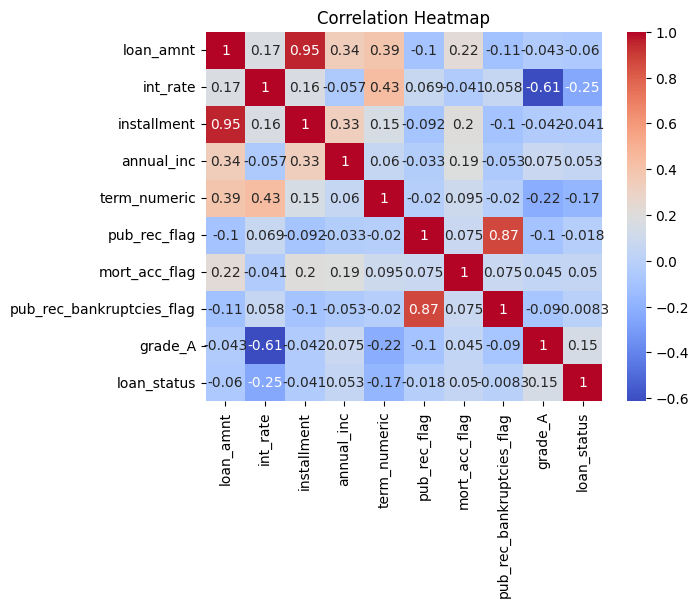

In [36]:
col1 = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'term_numeric', 'pub_rec_flag', 'mort_acc_flag',
       'pub_rec_bankruptcies_flag', 'grade_A','loan_status']
df1 = df[col1]
correlation_matrix = df1.corr()

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()

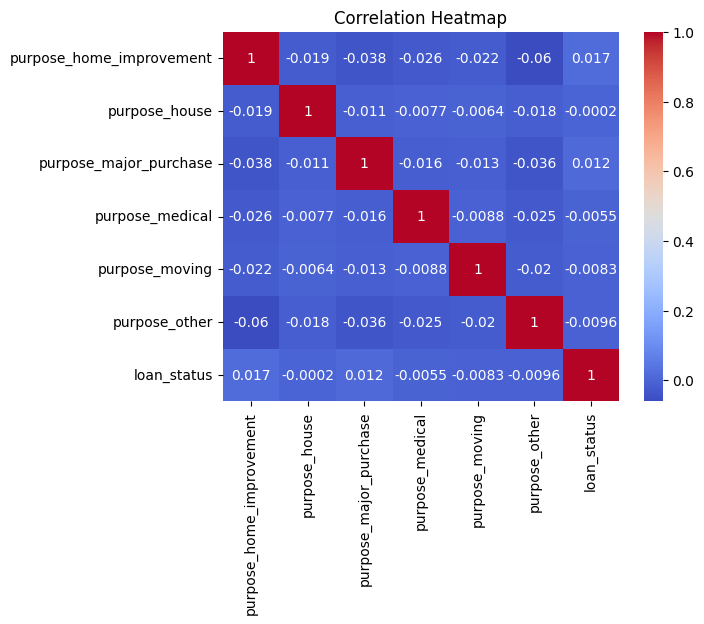

In [37]:
col2 = ['purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'loan_status']
df2 = df[col2]
correlation_matrix = df2.corr()

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()


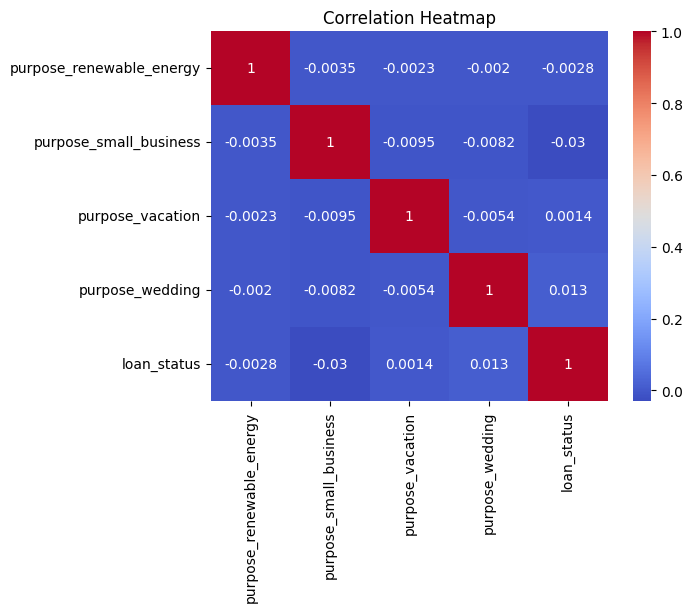

In [38]:

col3 = ['purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding',
       'loan_status']
df3 = df[col3]
correlation_matrix = df3.corr()

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()

In [39]:
#removing column with less than 1% of correlation
df.columns

cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'term_numeric', 'pub_rec_flag', 'mort_acc_flag',
        'grade_A','purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other','purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'
       ]
X = df[cols]
y  =  df['loan_status']


In [40]:
#Test train val split
#60% is Training data and 20 % is cross Validation data
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(237618, 18)

In [41]:
#use standard scaler to scale columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
# Handle class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', random_state=42)

In [44]:
# Predict and evaluate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
train_acc = accuracy_score(y_train_res, model.predict(X_train_res))
val_acc = accuracy_score(y_val, model.predict(X_val))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f'Train Accuracy: {train_acc}, Validation Accuracy: {val_acc}, Test Accuracy: {test_acc}')

# Cross-validation scores
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Train Accuracy: 0.639985745953056, Validation Accuracy: 0.6418453147488826, Test Accuracy: 0.6441557457768351
Cross-validation Scores: [0.63800603 0.64229847 0.64109316 0.63944241 0.63899697]
Mean CV Accuracy: 0.6399674094878055


In [45]:
model.intercept_

array([0.15739732])

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameters grid for Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                           param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Get best hyperparameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Define hyperparameters distributions for Random Search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Perform Random Search
random_search = RandomizedSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                                   param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy',
                                   random_state=42, verbose=1)
random_search.fit(X_train_res, y_train_res)

# Get best hyperparameters and best accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.6399805105995664
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Best Accuracy: 0.6399805105995664
